In [1]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
groceries = []
with open(r"C:\Users\Administrator.DAI-PC2\Desktop\ML\Day12\Groceries.csv", "r") as f:groceries=f.read()
groceries = groceries.split("\n")

In [3]:
groceries_list = []
for i in groceries:
    groceries_list.append(i.split(","))

In [4]:
te = TransactionEncoder()
te_ary = te.fit(groceries_list).transform(groceries_list)
te_ary

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [5]:
fp_df = pd.DataFrame(te_ary, columns = te.columns_)

In [6]:
#support of 1_tem freq sets
itemFrequency = fp_df.sum(axis=0) / len(fp_df)
itemFrequency = itemFrequency.sort_values(ascending=False)

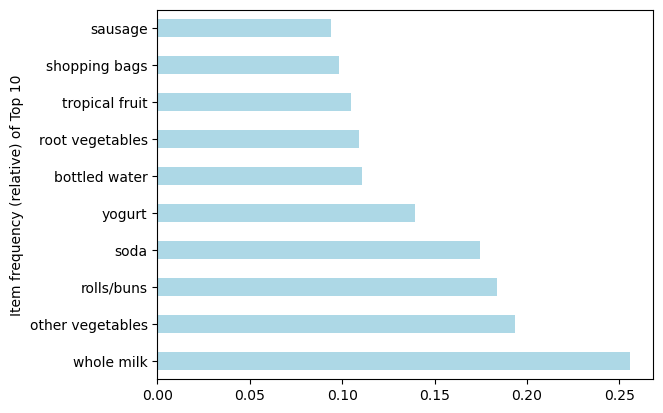

In [7]:
#and plot as histogram
ax = itemFrequency[:10].plot.barh(color='lightblue')
plt.ylabel('Item frequency (relative) of Top 10')
plt.show()

In [9]:
#create frequency itemsets
itemsets = apriori(fp_df, min_support=0.01, use_colnames=True)
itemsets

,support,itemsets
0,0.033452,(UHT-milk)
1,0.017692,(baking powder)
2,0.052466,(beef)
3,0.033249,(berries)
4,0.026029,(beverages)
...,...,...
328,0.011998,"(root vegetables, whole milk, tropical fruit)"
329,0.014540,"(root vegetables, yogurt, whole milk)"
330,0.010473,"(yogurt, whole milk, soda)"
331,0.015150,"(yogurt, whole milk, tropical fruit)"


In [11]:
rules = association_rules(itemsets, metric = 'confidence', min_threshold=0.5)
rules.sort_values(by=['lift'], ascending=False).head(6)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059,0.681990
6,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244,0.683367
5,"(root vegetables, rolls/buns)",(other vegetables),0.024301,0.193493,0.012201,0.502092,2.594890,0.007499,1.619792,0.629935
7,"(root vegetables, yogurt)",(other vegetables),0.025826,0.193493,0.012913,0.500000,2.584078,0.007916,1.613015,0.629266
2,"(yogurt, curd)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567,0.571107
0,"(other vegetables, butter)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992,0.565878


In [12]:
rules_df = rules[rules["lift"]>1]
rules_df = rules.sort_values(by=['lift'], ascending=False).head()
print(rules_df[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

                         antecedents         consequents   support  \
1    (root vegetables, citrus fruit)  (other vegetables)  0.010371   
6  (root vegetables, tropical fruit)  (other vegetables)  0.012303   
5      (root vegetables, rolls/buns)  (other vegetables)  0.012201   
7          (root vegetables, yogurt)  (other vegetables)  0.012913   
2                     (yogurt, curd)        (whole milk)  0.010066   

   confidence      lift  
1    0.586207  3.029608  
6    0.584541  3.020999  
5    0.502092  2.594890  
7    0.500000  2.584078  
2    0.582353  2.279125  
